In [1]:
"""Inspect result of ray_pipeline for the cryo_exp dataset"""

'Inspect result of ray_pipeline for the cryo_exp dataset'

In [59]:
import csv
import functools
import importlib
import os

import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import torch
import ray
import sys

from ray.tune.analysis import Analysis

# On slacgpu:
# sys.path.append('/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/code/vaetree')
print(sys.path)

import analyze
import datasets
import nn
import vis
analyze.reload_libs()

['/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ray/pyarrow_files', '', '/opt/rh/devtoolset-6/root/usr/lib64/python2.7/site-packages', '/opt/rh/devtoolset-6/root/usr/lib/python2.7/site-packages', '/opt/rh/rh-python36/root/usr/lib64/python36.zip', '/opt/rh/rh-python36/root/usr/lib64/python3.6', '/opt/rh/rh-python36/root/usr/lib64/python3.6/lib-dynload', '/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages', '/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages', '/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/IPython/extensions', '/home/nmiolane/.ipython', '/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/code/vaetree', '/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/code/vaetree']


In [36]:
CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if CUDA else "cpu")

# MAIN_DIR = '/results/output_cryo_exp'
MAIN_DIR = '/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp'

In [37]:
analysis_path = os.path.join(MAIN_DIR)
analysis = Analysis(analysis_path)

best_logdir = analysis.get_best_logdir(metric="average_loss", mode='min')
print("Best logdir is", best_logdir)
OUTPUT = best_logdir

Best logdir is /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_26_beta1=0.46253,beta2=0.90062,latent_dim=10,lr=0.0005_2019-11-04_16-50-552z78dsot


In [72]:
analyze.get_best_logdir(main_dir=MAIN_DIR, select_dict={'latent_dim': 3})

Comparing logdirs with parameters:
{'latent_dim': 3}
Best logdir with required parameters is /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a


'/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a'

In [40]:
# DATA_DIR = '/data/cryo'
DATA_DIR = '/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo'

DATA_TYPE = 'cryo_exp'

IMG_SHAPE = (128, 128)
SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_%s.npy' % (
        DATA_TYPE, SHAPE_STR))
DATASET = np.load(DATASET_PATH)

LABELS_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_labels_%s.csv' % (
        DATA_TYPE, SHAPE_STR))

CMAP = 'gray'

SUB_DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/sub_%s_%s.npy' % (
        DATA_TYPE, SHAPE_STR))

SUB_LABELS_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/sub_%s_labels_%s.npy' % (
        DATA_TYPE, SHAPE_STR))

In [10]:
N_SUB = 1000
SUB_DATASET = DATASET[:N_SUB]
np.save(SUB_DATASET_PATH, SUB_DATASET)

In [11]:
sublabels = analyze.get_cryo_labels(labels_path=LABELS_PATH, from_id=1, to_id=N_SUB)
all_focuses = sublabels['focus']
all_thetas = sublabels['theta']
with open(SUB_DATASET_PATH, 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['focus', 'theta'])
    for focus, theta in zip(all_focuses, all_thetas):
        writer.writerow([focus, theta])

In [12]:
len(sublabels['focus'])

1000

# Show original data

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_128x128.npy
Dataset shape: (5119, 1, 128, 128)


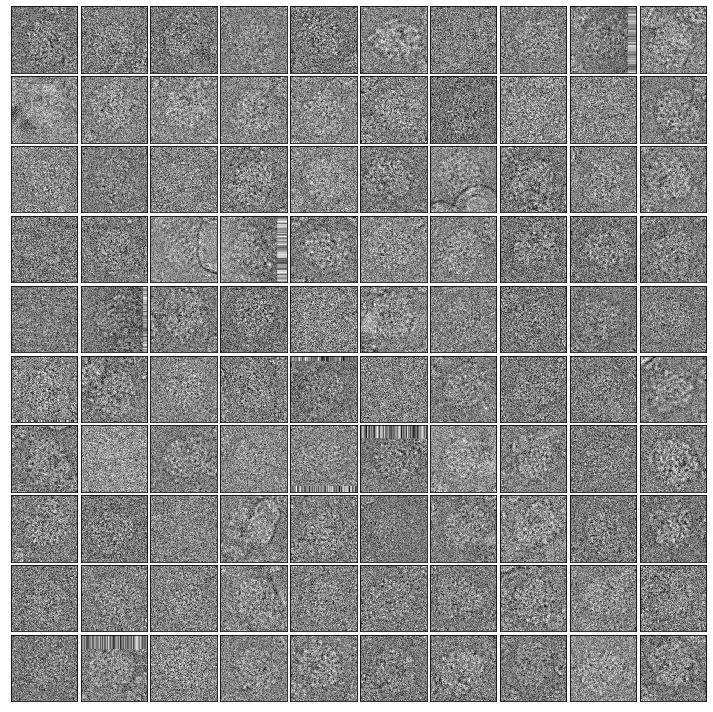

In [19]:
vis.show_data(DATASET_PATH, nrows=10, ncols=10, figsize=(10, 10))
plt.subplots_adjust(hspace=0.051, wspace=0.05)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_

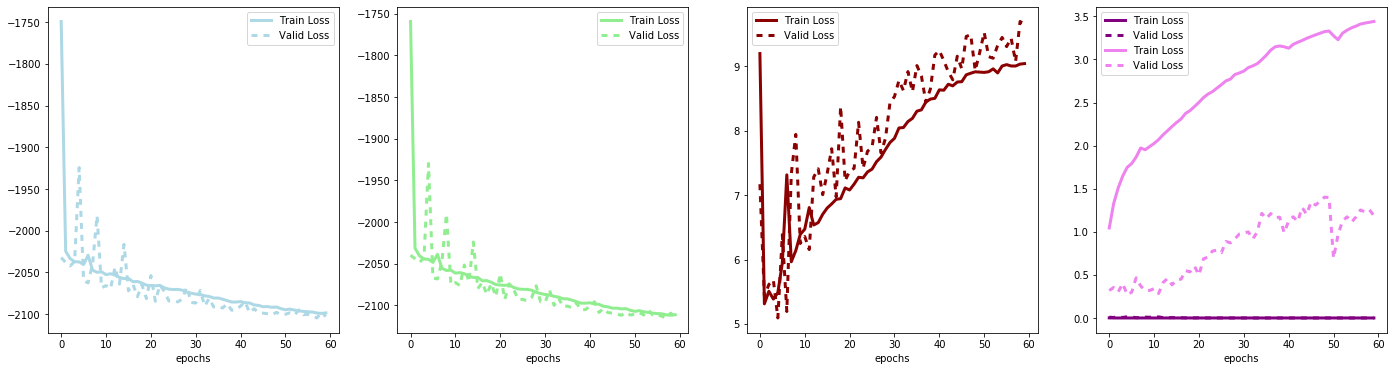

In [41]:
vis.plot_losses(OUTPUT)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...


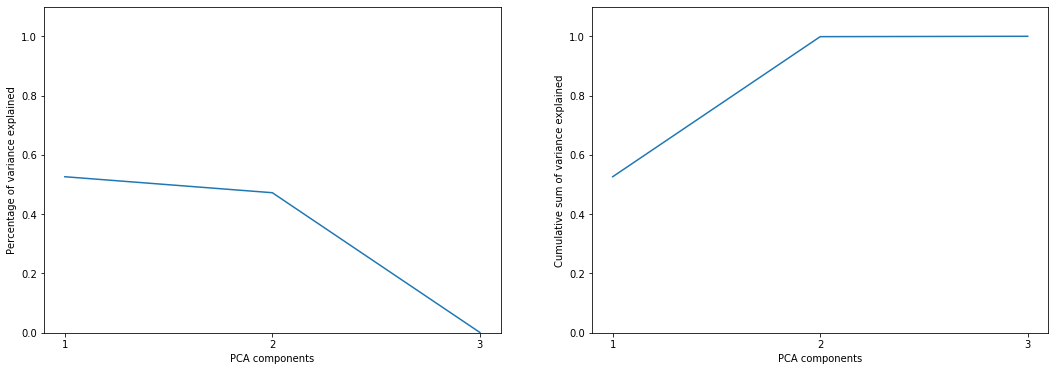

In [42]:
ax = vis.plot_variance_explained(OUTPUT, DATASET_PATH)

In [43]:
_, labels = analyze.get_cryo(OUTPUT, DATASET_PATH, LABELS_PATH)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(5119, 3)


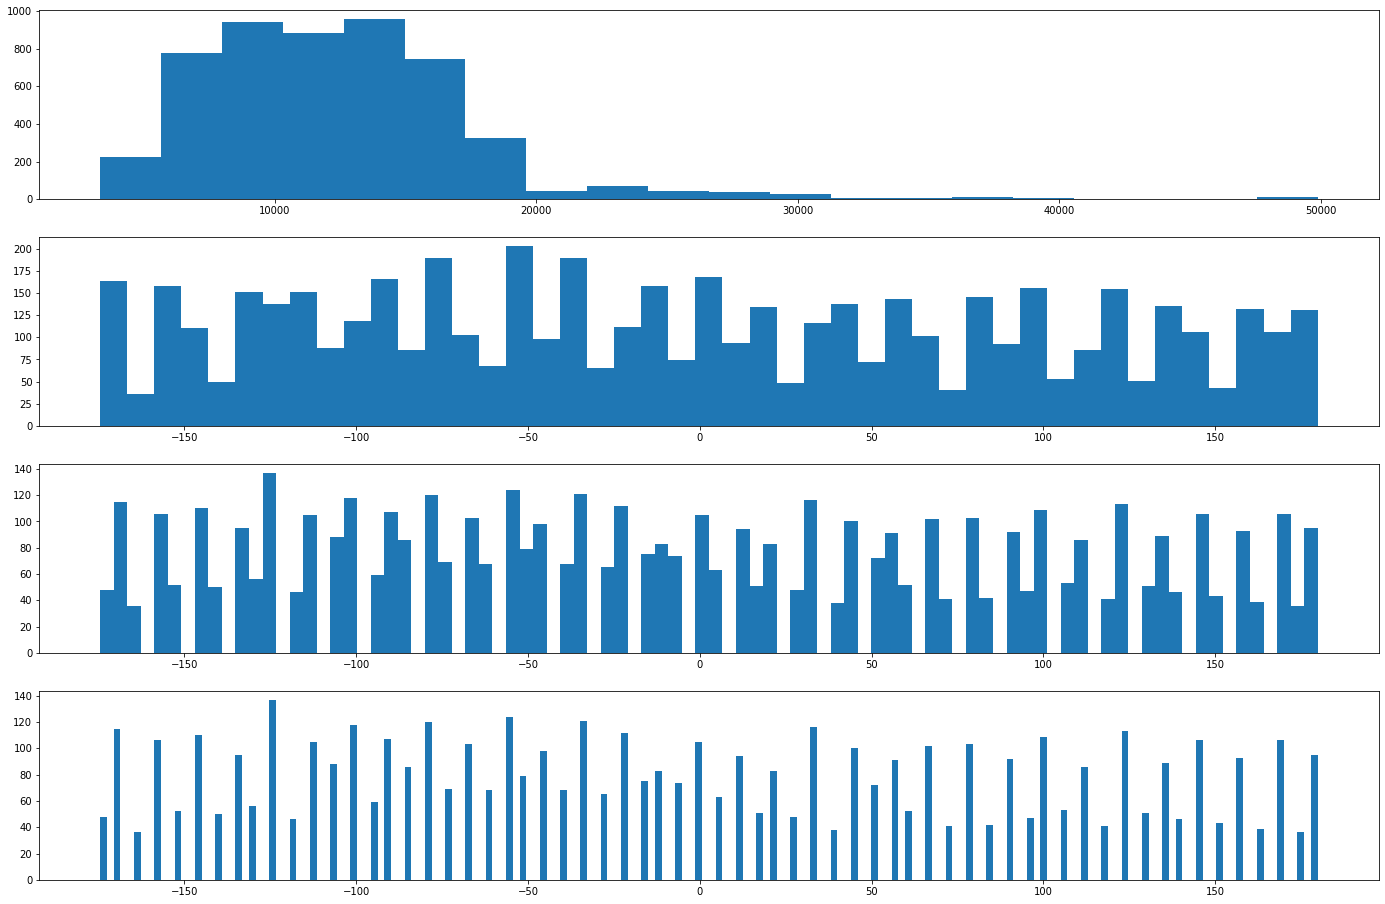

In [44]:
vis.hist_labels(labels)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(5119, 3)


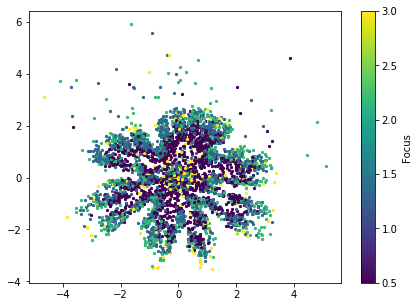

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH)
cb = fig.colorbar(im, ax=ax)
focus = cb.set_label('Focus')
yticklabels = cb.ax.set_yticklabels(np.arange(start=0.5, stop=5.5, step=0.5))

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(5119, 3)


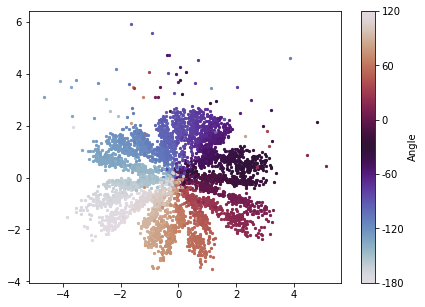

In [46]:
import matplotlib.cm as cm
colormap_tw = cm.get_cmap('twilight')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH, label_name='theta')
cb = fig.colorbar(cm.ScalarMappable(cmap=colormap_tw), ax=ax)
angle = cb.set_label('Angle')

yticklabels = cb.ax.set_yticklabels(np.arange(start=-180, stop=181, step=72))

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(5119, 3)


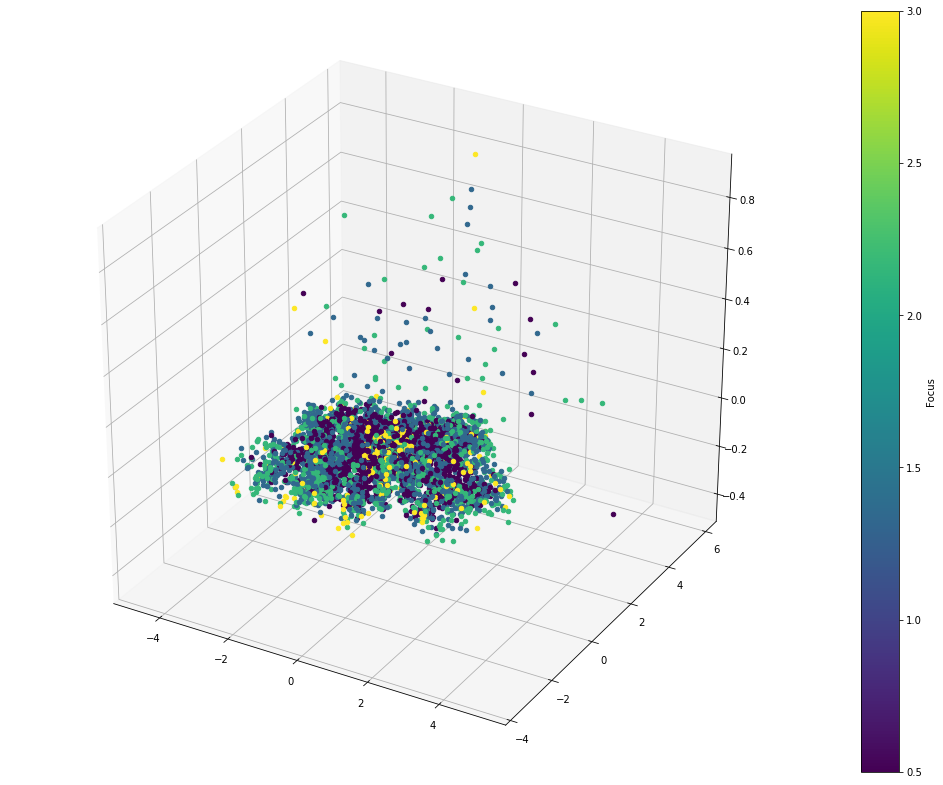

In [47]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH, n_pc=3)
cb = fig.colorbar(im, ax=ax)
focus = cb.set_label('Focus')
yticklabels = cb.ax.set_yticklabels(np.arange(start=0.5, stop=3.5, step=0.5))

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(5119, 3)


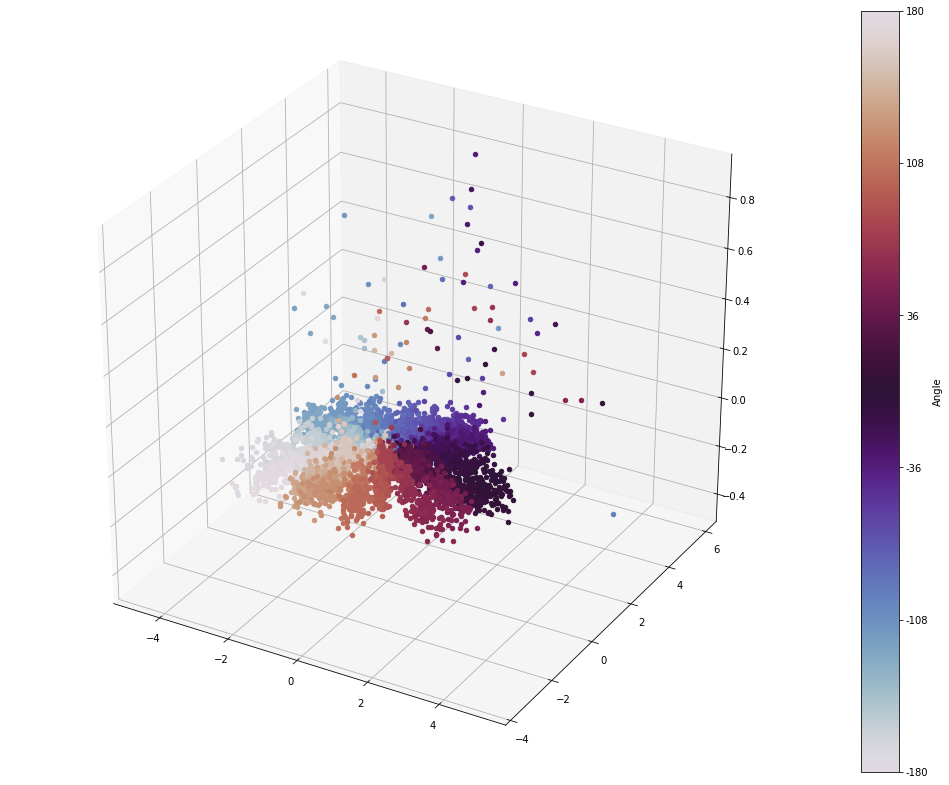

In [48]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH, n_pc=3, label_name='theta')
cb = fig.colorbar(cm.ScalarMappable(cmap=colormap_tw), ax=ax)
angle = cb.set_label('Angle')
yticklabels = cb.ax.set_yticklabels(np.arange(start=-180, stop=181, step=72))

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_128x128.npy
Dataset shape: (5119, 1, 128, 128)
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_60/epoch_60_checkpoint.pth.


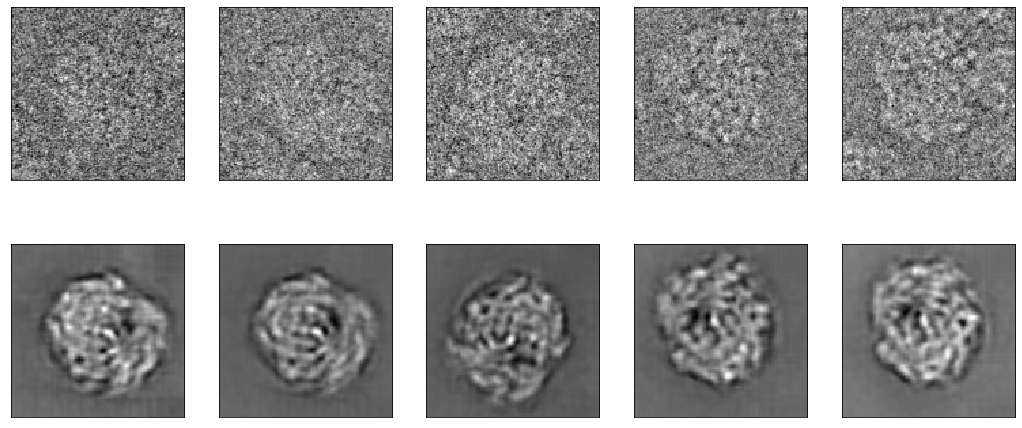

In [49]:
epoch_id = 60
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_128x128.npy
Dataset shape: (5119, 1, 128, 128)
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_5/epoch_5_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_5/epoch_5_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_5/epoch_5_checkpoint.pth.


AssertionError: 

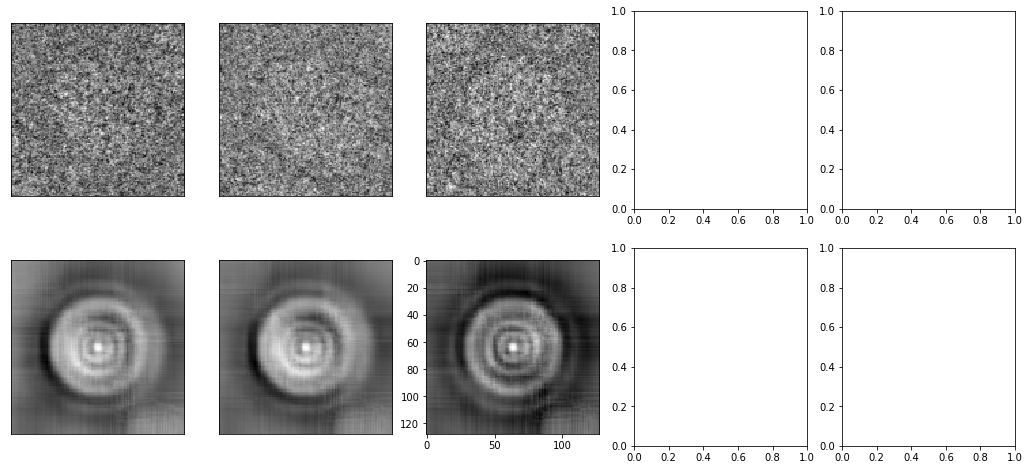

In [50]:
%matplotlib inline
epoch_id = 5
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_128x128.npy
Dataset shape: (5119, 1, 128, 128)
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_10/epoch_10_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_10/epoch_10_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_10/epoch_10_checkpoint.pth.


AssertionError: 

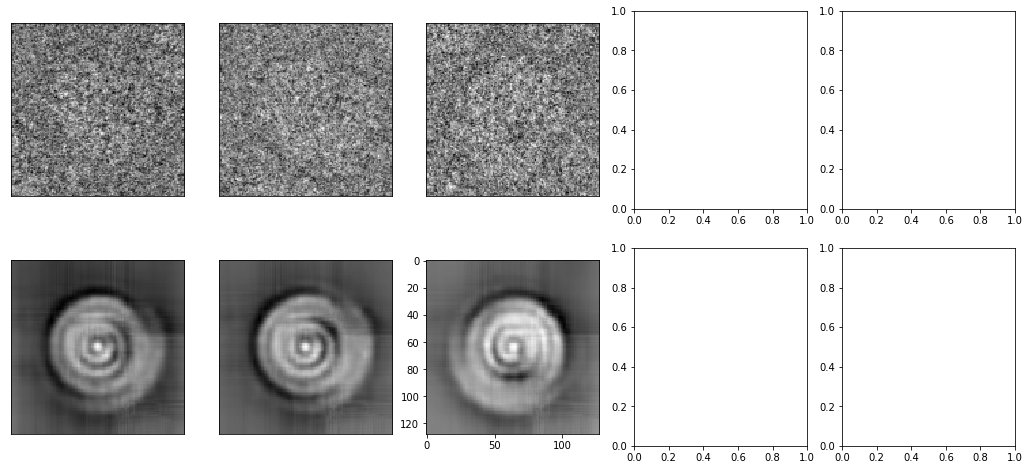

In [51]:
epoch_id = 10
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_128x128.npy
Dataset shape: (5119, 1, 128, 128)
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_20/epoch_20_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_20/epoch_20_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_20/epoch_20_checkpoint.pth.


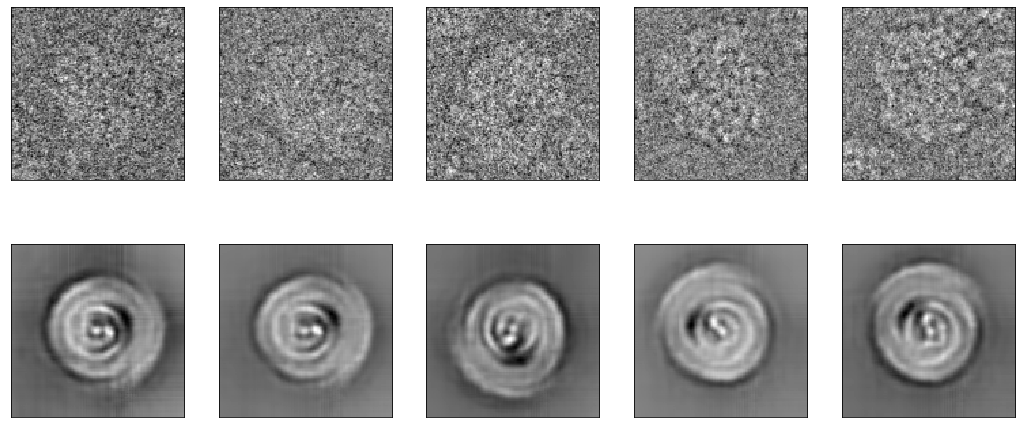

In [52]:
epoch_id = 20
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_128x128.npy
Dataset shape: (5119, 1, 128, 128)
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_30/epoch_30_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_30/epoch_30_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_30/epoch_30_checkpoint.pth.


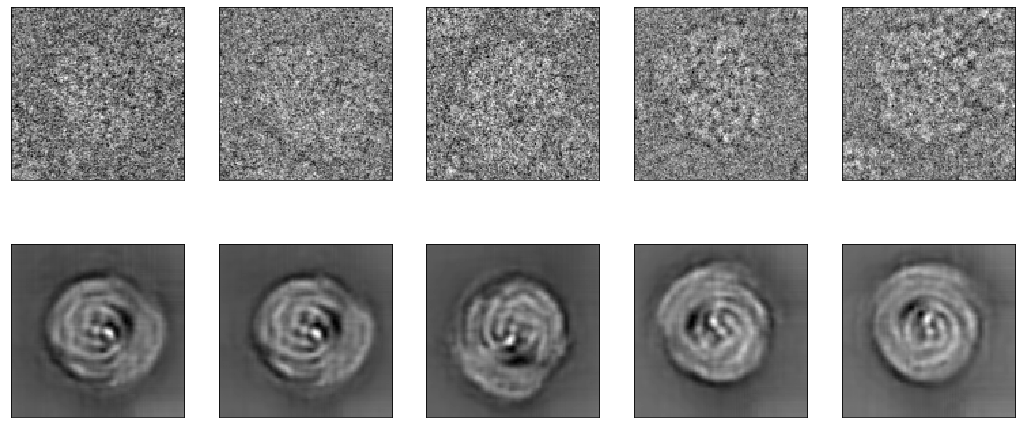

In [53]:
epoch_id = 30
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_128x128.npy
Dataset shape: (5119, 1, 128, 128)
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_40/epoch_40_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_40/epoch_40_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_40/epoch_40_checkpoint.pth.


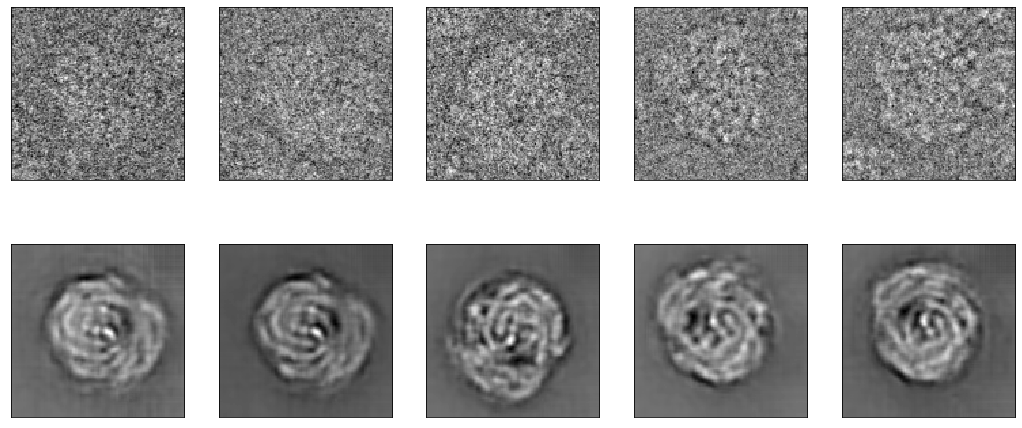

In [54]:
epoch_id = 40
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_128x128.npy
Dataset shape: (5119, 1, 128, 128)
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_50/epoch_50_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_50/epoch_50_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp/Train_56_beta1=0.7693,beta2=0.94575,latent_dim=3,lr=0.0005_2019-11-04_13-51-42q5ay5d3a/checkpoint_50/epoch_50_checkpoint.pth.


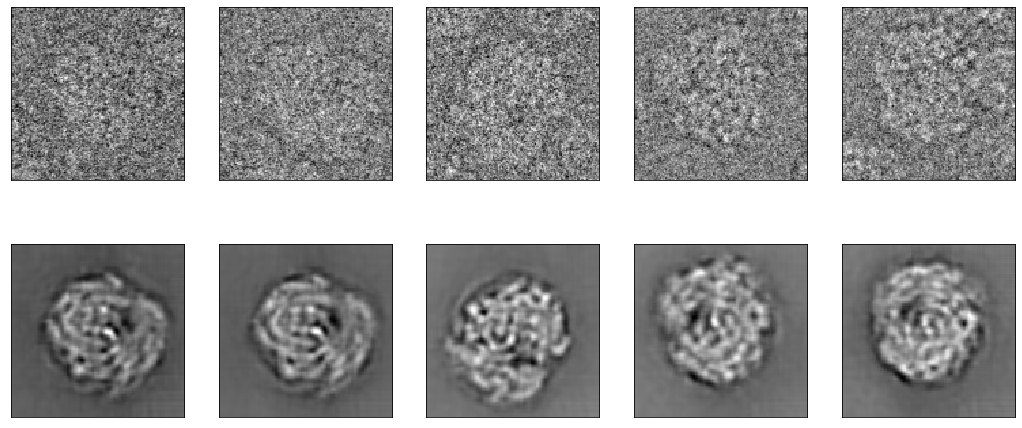

In [55]:
epoch_id = 50
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)